# Домашняя работа №1

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import warnings
import math

from matplotlib import pyplot as plt
from scipy import linalg


warnings.filterwarnings("ignore")

## Задание 1

Изобразите с помощью matplotlib. Изобразите точку x + 2y + 3z. Найдите угол между векторами x, y и x, z. 

In [2]:
x = np.array([1,1])
y = np.array([2, 0])
z = np.array([0,2])

In [3]:
a = x + 2 * y + 3 * z
a

array([5, 7])

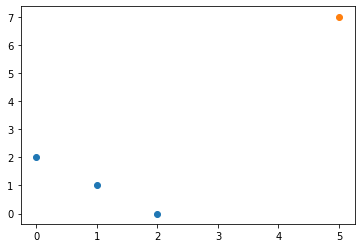

In [23]:
plt.scatter([x[0],y[0],z[0]],[x[1],y[1],z[1]])
plt.scatter(a[0], a[1])


In [24]:
def calculate_angle(vector_1, vector_2):
    rad = np.arccos(np.dot(vector_1, vector_2)/((np.linalg.norm(vector_1)*np.linalg.norm(vector_2))))
    deg = rad*(180/np.pi)
    print('Угол между векторами равен ', round(deg,2), 'градусов.')

In [25]:
calculate_angle(x,y)

Угол между векторами равен  45.0 градусов.


In [26]:
calculate_angle(x,z)

Угол между векторами равен  45.0 градусов.


## Задание 2

Загрузите модель человека. Найдите расстояние от правой кисти до позвоночника

In [28]:
ns = ['type', 'x', 'y', 'z']
# read points for joints
dfJointsVertexes = pd.read_csv('joints.txt', sep=' ', names = ns)
axis_sort = 'x' 
df = dfJointsVertexes.sort_values(by=[axis_sort])
df.head()

,type,x,y,z
21,v,-0.392414,0.045288,0.025403
20,v,-0.283883,0.219551,-0.024912
19,v,-0.163721,0.476657,-0.030335
18,v,-0.163721,0.476657,-0.030335
17,v,-0.163721,0.476657,-0.030335


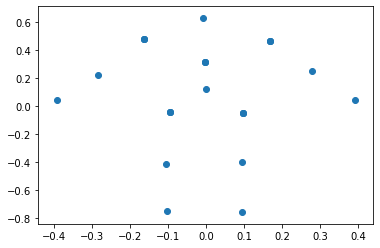

In [29]:
plt.scatter(df.x, df.y)

In [30]:
vect_spine = np.array([df.x[0]-df.x[11], df.y[0]-df.y[11]])
vect_brush = np.array([df.x[16],df.y[16]])
cv = np.array(df.x[0], df.y[0]) + (np.dot(vect_brush,vect_spine))/np.dot(vect_spine,np.transpose(vect_spine))*vect_spine
linalg.norm(cv - vect_brush)

0.39147649704306015

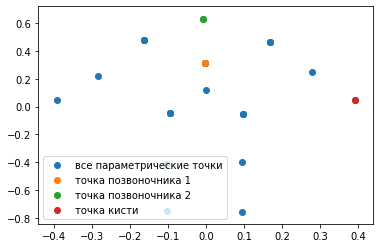

In [31]:
plt.scatter(df.x, df.y)

plt.scatter(df.x[9], df.y[9])
plt.scatter(df.x[11], df.y[11])
plt.scatter(df.x[16], df.y[16])
plt.legend(['все параметрические точки', 'точка позвоночника 1','точка позвоночника 2','точка кисти'])

In [37]:
v = np.array([df.x[9] - df.x[11], df.y[9] - df.y[11]])
w = np.array([df.x[16],df.y[16]])
cv = np.array(df.x[9], df.y[9]) + (np.dot(w,v))/np.dot(v,np.transpose(v))*v
dist = linalg.norm(cv - w)
print('Расстояние от точки правой кисти до точки позвоночника: ', round(dist,2))

Расстояние от точки правой кисти до точки позвоночника:  0.39


# Задание 3

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy). Для матрицы 3x3 можно посмотреть на корни характеристического многочлена, посчитанные в numpy.

In [40]:
from numpy import linalg as LA
m1 = np.array([[2, 2],
               [1, 3]])

m2 = np.array([[4, 1, -1],
               [1, 4, -1],
               [-1, -1, 4]])

In [41]:
e_vals, e_vecs = LA.eig(m1)

In [42]:
print('Исходная матрица: \n', m1)

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[2 2]
 [1 3]]
Собственные вектора: 
 [[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]
Собственные значения:  [1. 4.]


In [44]:
e_vals, e_vecs = LA.eig(m2)

In [45]:
print('Исходная матрица: \n', m2)

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]]
Собственные вектора: 
 [[-0.81649658  0.57735027 -0.27658128]
 [ 0.40824829  0.57735027  0.8035929 ]
 [-0.40824829 -0.57735027  0.52701162]]
Собственные значения:  [3. 6. 3.]
